In [10]:
#Step 1- Import Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
#Step 2- Load the Dataset
# Read the Pharma Sector data 
df = pd.read_csv("C:\\Users\\sin\\Documents\\algo\\Pharma Heatmap data.csv")
print(df.head(10))

   Symbol  Change  Yrows  Xcols
0  BIOCON    3.18      1      1
1  SYNINT    2.45      1      2
2  DRREDD    1.80      1      3
3  TORPHA    1.48      1      4
4     FDC    0.75      1      5
5   DRLAL    0.56      2      1
6  INDREM    0.20      2      2
7  ABBIND    0.04      2      3
8  GRANUL    0.00      2      4
9  GLAPHA   -0.04      2      5


In [15]:
#Step 3- Create Numpy array
"""
Since we want to construct a 6 x 5 matrix, we create an n-dimensional array of the same shape for “Symbol” and the “Change” columns.
"""
# Create an array of stock symbols & their respective percentage price change
symbol = ((np.asarray(df['Symbol'])).reshape(6,5))
perchange = ((np.asarray(df['Change'])).reshape(6,5))

print(symbol)
print(perchange)

[['BIOCON' 'SYNINT' 'DRREDD' 'TORPHA' 'FDC']
 ['DRLAL' 'INDREM' 'ABBIND' 'GRANUL' 'GLAPHA']
 ['DIVLAB' 'GLEPHA' 'CIPLA' 'SANOFI' 'IPCLAB']
 ['APOHOS' 'NARHRU' 'STRSHA' 'ORCPHA' 'OPTCIR']
 ['JUBLIF' 'PFIZER' 'CADHEA' 'LUPIN' 'WOCKHA']
 ['SUNPHA' 'FORHEA' 'THYTEC' 'AJAPHA' 'AURPHA']]
[[ 3.18  2.45  1.8   1.48  0.75]
 [ 0.56  0.2   0.04  0.   -0.04]
 [-0.05 -0.11 -0.12 -0.22 -0.3 ]
 [-0.31 -0.43 -0.49 -0.52 -0.53]
 [-0.63 -0.85 -0.89 -0.91 -0.93]
 [-1.12 -1.24 -1.8  -1.94 -3.2 ]]


In [16]:
#Step 4- Create a Pivot in Python
"""
The pivot function is used to create a new derived table from the given data frame object “df”. 
The function takes three arguments; index, columns, and values. 
The cell values of the new table are taken from the column given as the values parameter, which in our case is the “Change” column.
"""
# Create a pivot table
result = df.pivot(index='Yrows',columns='Xcols',values='Change')
print(result)

Xcols     1     2     3     4     5
Yrows                              
1      3.18  2.45  1.80  1.48  0.75
2      0.56  0.20  0.04  0.00 -0.04
3     -0.05 -0.11 -0.12 -0.22 -0.30
4     -0.31 -0.43 -0.49 -0.52 -0.53
5     -0.63 -0.85 -0.89 -0.91 -0.93
6     -1.12 -1.24 -1.80 -1.94 -3.20


In [17]:
#Step 5 - Create an array to annotate the heatmap
"""
In this step, we create an array that will be used to annotate the Seaborn heatmap. 
We call the flatten method on the “symbol” and “percentage” arrays to flatten a Python list of lists in one line.

The zip function which returns an iterator zips a list in Python. 
We run a Python For loop and by using the format function; 
we format the stock symbol and the percentage price change value as per our requirement.
"""

# Create an array to annotate the heatmap
labels = (np.asarray(["{0} \n {1:.2f}".format(symb,value)
                      for symb, value in zip(symbol.flatten(),
                                               perchange.flatten())])
         ).reshape(6,5)

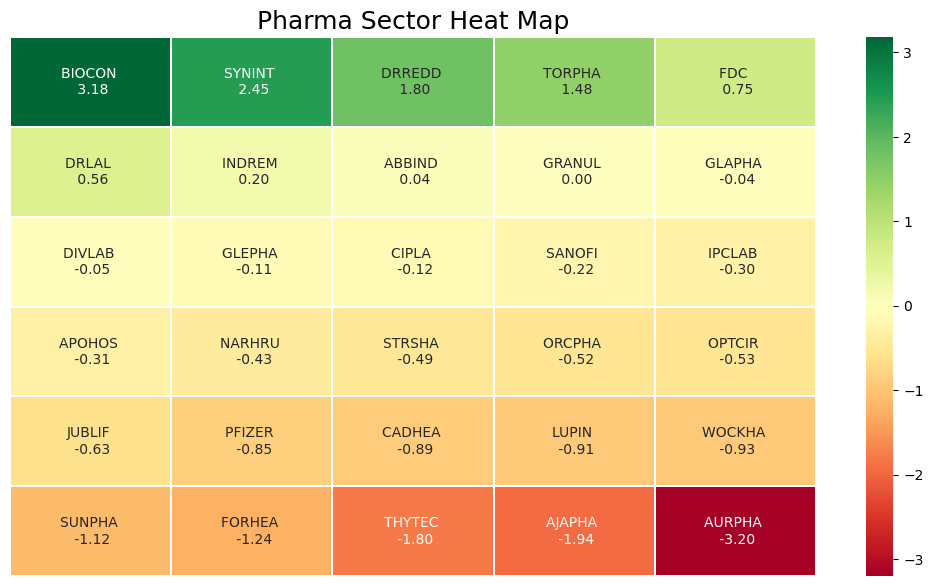

In [22]:
#Step 6 - Create the Matplotlib figure and define the plot
"""
We create an empty Matplotlib plot and define the figure size. 
We also add the title to the plot and set the title’s font size, and its distance from the plot using the set_position method.

We wish to display only the stock symbols and their respective single-day percentage price change. 
Hence, we hide the ticks for the X & Y axis, and also remove both the axes from the heatmap plot.
"""

# Define the plot
fig, ax = plt.subplots(figsize=(13,7))

# Add title to the Heat map
title = "Pharma Sector Heat Map"

# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18)
ttl = ax.title
ttl.set_position([0.5,1.05])

# Hide ticks for X & Y axis
ax.set_xticks([])
ax.set_yticks([])

# Remove the axes
ax.axis('off')

#Step 7- Create the heatmap
"""
In the final step, we create the heatmap using the heatmap function from the Seaborn package. The heatmap function takes the following arguments:

data – a 2D dataset that can be coerced into a ndarray. If a Pandas DataFrame is provided, 
the index/column information will be used to label the columns and rows.

annot – an array of the same shape as data which is used to annotate the heatmap.
cmap – a matplotlib colormap name or object. This maps the data values to the color space.
fmt – string formatting code to use when adding annotations.
linewidths – sets the width of the lines that will divide each cell.
"""
# Use the heatmap function from the seaborn package
sns.heatmap(result,annot=labels,fmt="",cmap='RdYlGn',linewidths=0.30,ax=ax)

# Display the Pharma Sector Heatmap
plt.show()